In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
df1=pd.read_csv('/content/drive/MyDrive/Unemployment in India/Unemployment in India.csv')
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data exploration**

In [67]:
df1.shape

(768, 7)

In [68]:
df1.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [69]:
df1.tail(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [71]:
df1.describe().round(2)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.00,740.00,740.00
mean,11.79,7204460.03,42.63
std,10.72,8087988.43,8.11
min,0.00,49420.00,13.33
25%,4.66,1190404.50,38.06
50%,8.35,4744178.50,41.16
75%,15.89,11275489.50,45.50
max,76.74,45777509.00,72.57


In [72]:
df1.dtypes

,0
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


In [73]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [74]:
df1.columns=df1.columns.str.strip()
df1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [75]:
cols=['Region','Date','Frequency','Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)','Area']
for col in cols:
  print(f'{"*"*20} {col} {"*"*20}')
  print(df1[col].value_counts())
  print()

******************** Region ********************
Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

******************** Date ********************
Date
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-0

**Data Cleaning**

Handling missing values

In [76]:
df1.isna().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [77]:
df1.dropna(inplace=True)

In [78]:
df1.shape

(740, 7)

In [79]:
df1.isna().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


Handling duplicates

In [80]:
df1.duplicated().sum()

0

Handling outliers

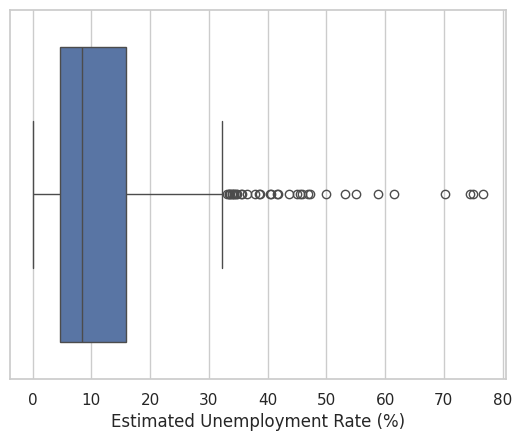

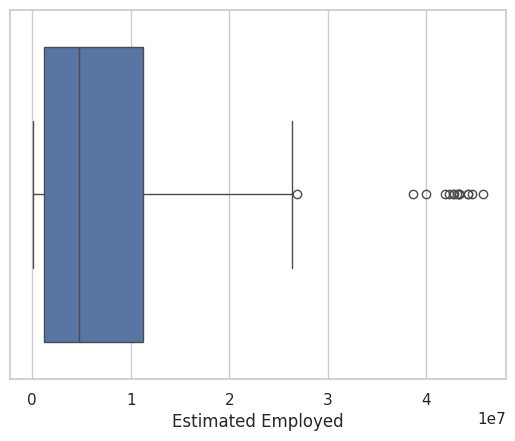

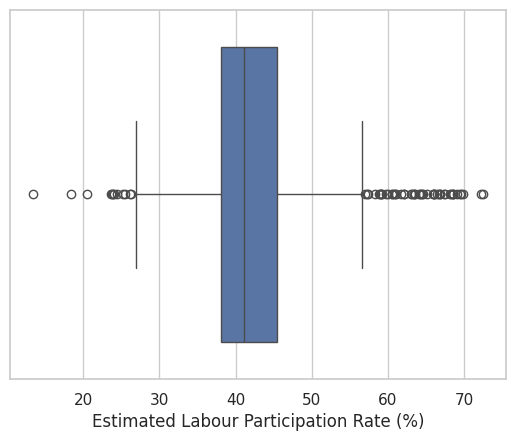

In [81]:
cols=['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']
for col in cols:
  sns.boxplot(x=df1[col])
  plt.show()

In [82]:
cols=['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']
for i in cols:
  z=np.abs(stats.zscore(df1[i]))
  threshold=1
  outliers_=df1[z>threshold]
  df1.drop(outliers_.index,inplace=True)

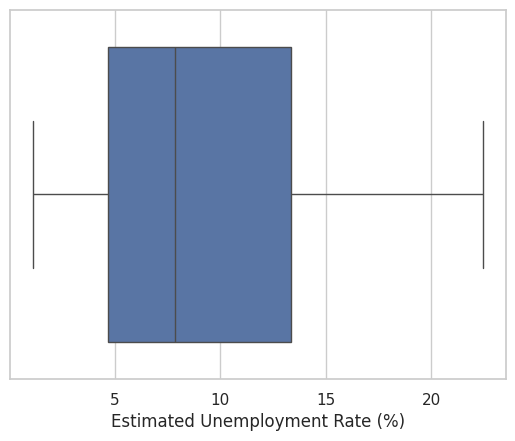

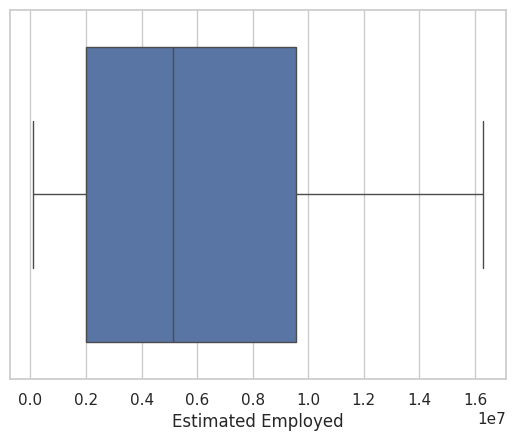

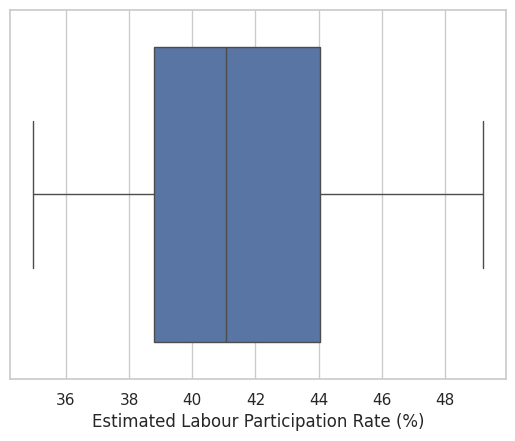

In [83]:
cols=['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']
for col in cols:
  sns.boxplot(x=df1[col])
  plt.show()

In [84]:
df1=df1.reset_index(drop=True)
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
439,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
440,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
441,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
442,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [85]:
df1.shape

(444, 7)

In [86]:
df1['Date'] = df1['Date'].str.strip()
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')


In [87]:
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
439,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
440,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
441,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
442,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [88]:
df1.dtypes

,0
Region,object
Date,datetime64[ns]
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


**Data Visualization**

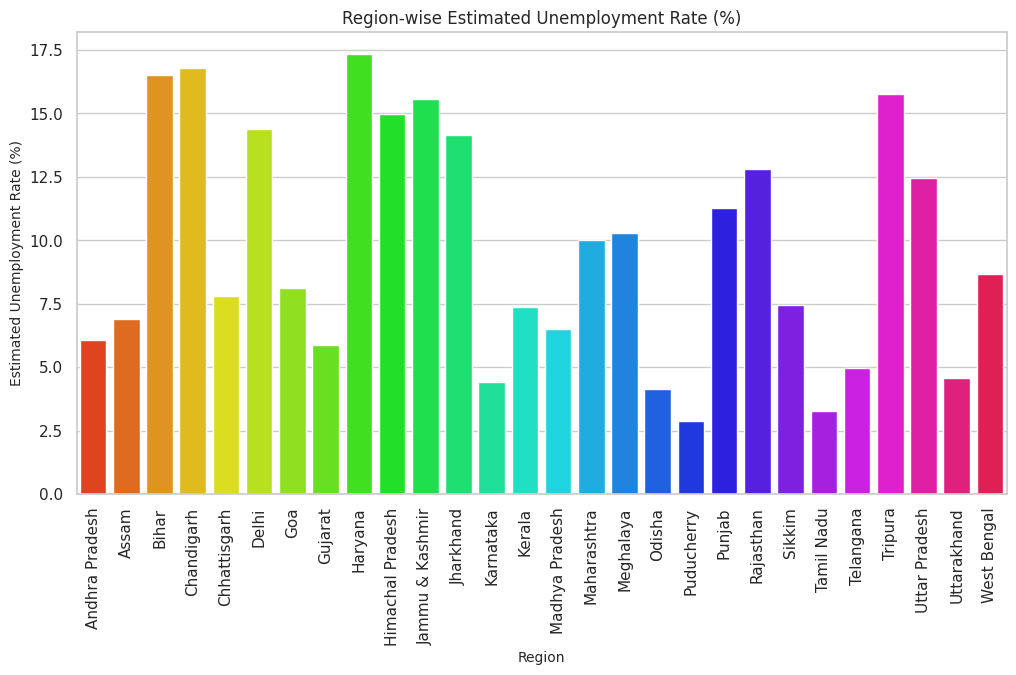

In [89]:
df1_grouped1 = df1.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(12, 6))
palette = sns.color_palette("hsv", len(df1_grouped1['Region'].unique()))
sns.barplot(data=df1_grouped1, x='Region', y='Estimated Unemployment Rate (%)',palette=palette)
plt.title('Region-wise Estimated Unemployment Rate (%)', fontsize=12)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=10)
plt.xticks(rotation=90)
plt.show()


Haryana, Chandigarh and Bihar has the highest Estimated Unemployment Rate while Puduchery, TamilNadu and Odisha has the lowest Estimated Unemployment Rate.

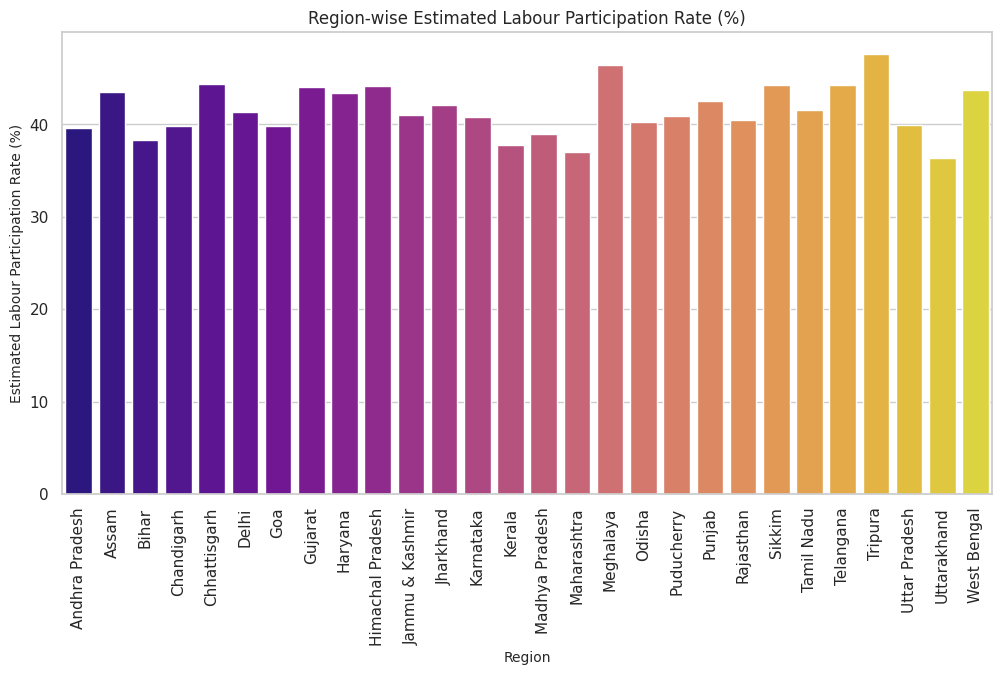

In [90]:
df1_grouped2 = df1.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().reset_index()
plt.figure(figsize=(12, 6))
palette = sns.color_palette("plasma", len(df1_grouped2['Region'].unique()))
sns.barplot(data=df1_grouped2, x='Region', y='Estimated Labour Participation Rate (%)',palette=palette)
plt.title('Region-wise Estimated Labour Participation Rate (%)', fontsize=12)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Estimated Labour Participation Rate (%)', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Tripura and Meghalaya have the highest Estimated Labour participation Rate while Uttarakhand has the least.

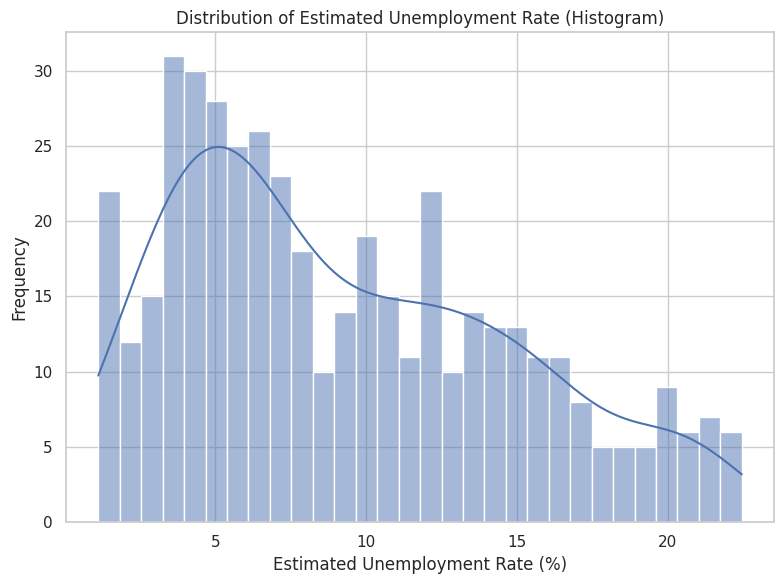

In [91]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df1['Estimated Unemployment Rate (%)'], bins=30, kde=True, ax=ax)
ax.set_title('Distribution of Estimated Unemployment Rate (Histogram)')
ax.set_xlabel('Estimated Unemployment Rate (%)')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

There is a greater proportion of areas with lower unemployment rates compared to areas with higher rates.

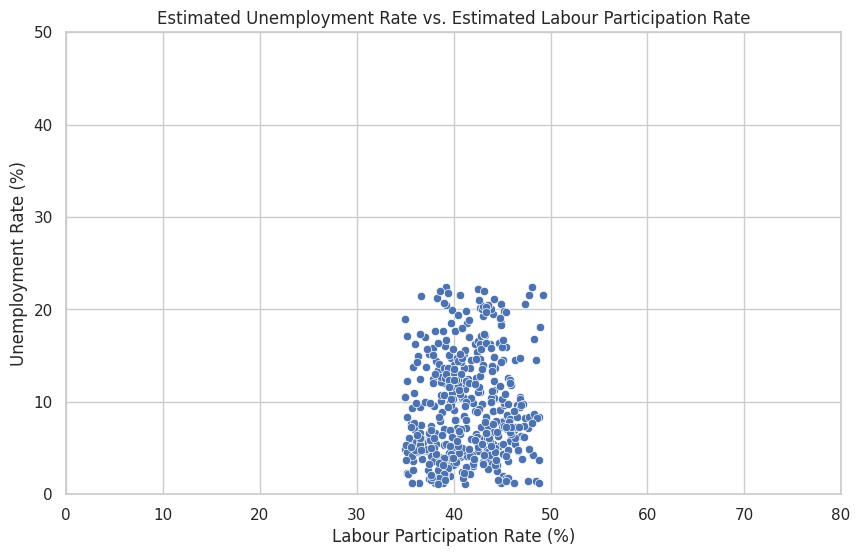

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', data=df1)
plt.title('Estimated Unemployment Rate vs. Estimated Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.xlim(0, 80)
plt.ylim(0, 50)
plt.show()

 There appears to be a weak negative correlation between unemployment rate and labor participation rate. As the labor participation rate increases, the unemployment rate tends to decrease, but the relationship is not very strong.

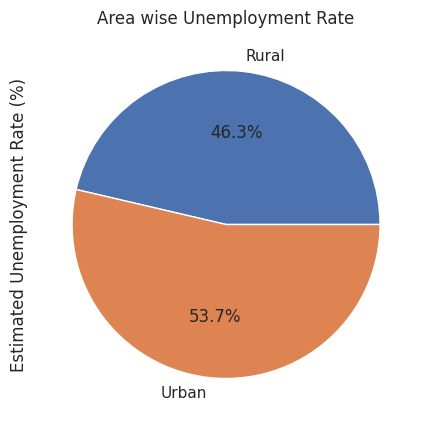

In [98]:
plt.figure(figsize=(5,5))
df1.groupby('Area')['Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Area wise Unemployment Rate')
plt.show()

The estimated unemployment rate in urban areas (53.7%) is higher than that in rural areas (46.3%).



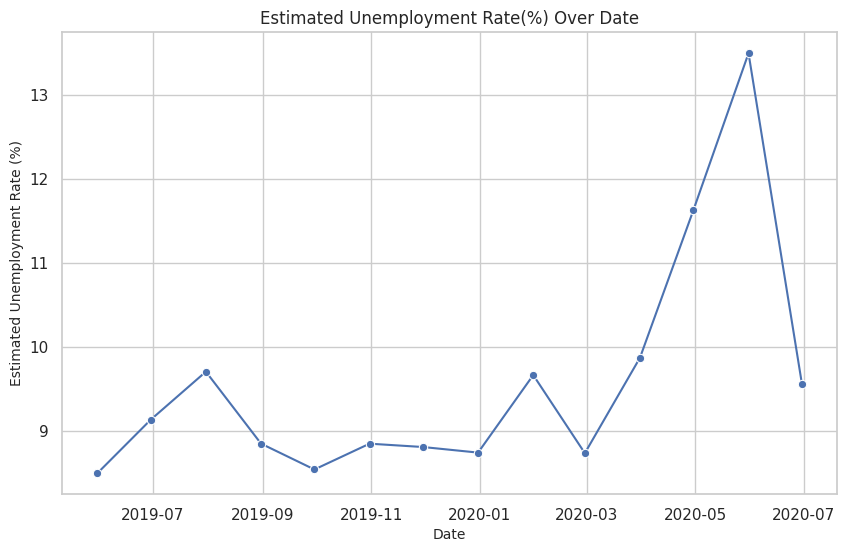

In [94]:
df1_grouped3 = df1.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1_grouped3, x='Date', y='Estimated Unemployment Rate (%)', marker='o')
plt.title('Estimated Unemployment Rate(%) Over Date', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=10)
plt.show()

The highest unemployment rate was recorded in 2020-06, reaching above 13%. The line chart indicates that the unemployment rate has experienced significant fluctuations over the period shown, with an overall trend of slight increase followed by a sharp decrease.

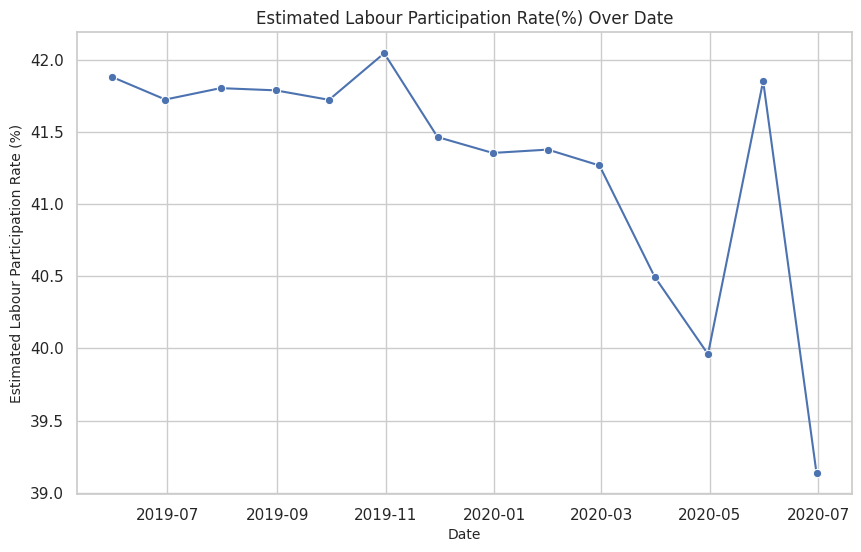

In [95]:
df1_grouped4 = df1.groupby('Date')['Estimated Labour Participation Rate (%)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1_grouped4, x='Date', y='Estimated Labour Participation Rate (%)', marker='o')
plt.title('Estimated Labour Participation Rate(%) Over Date', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Estimated Labour Participation Rate (%)', fontsize=10)
plt.show()

 While there are fluctuations, the overall trend appears to be a slight decrease from 2019-07 to 2020-07, with a significant drop in 2020-07.

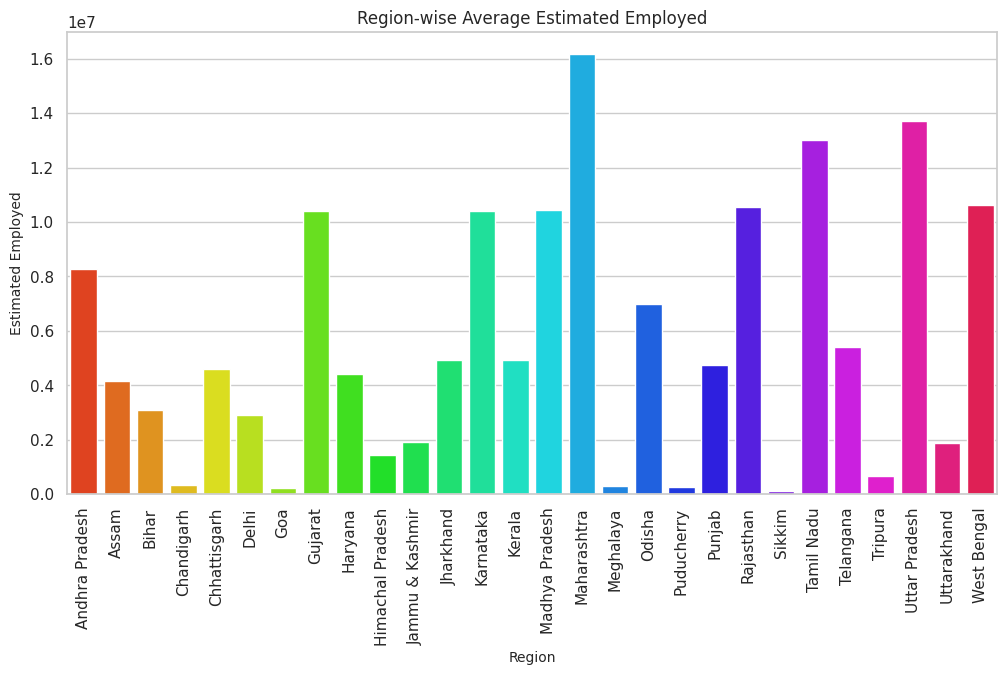

In [96]:
df1_grouped5 = df1.groupby('Region')['Estimated Employed'].mean().reset_index()
plt.figure(figsize=(12, 6))
palette = sns.color_palette("hsv", len(df1_grouped5['Region'].unique()))
sns.barplot(data=df1_grouped5, x='Region', y='Estimated Employed',palette=palette)
plt.title('Region-wise Average Estimated Employed', fontsize=12)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Estimated Employed', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Maharashtra has the highest estimated employed population, followed by Uttar Pradesh and Tamil Nadu. Sikkim has the lowest estimated employed population, followed by Goa, Puducherry and Meghalaya.

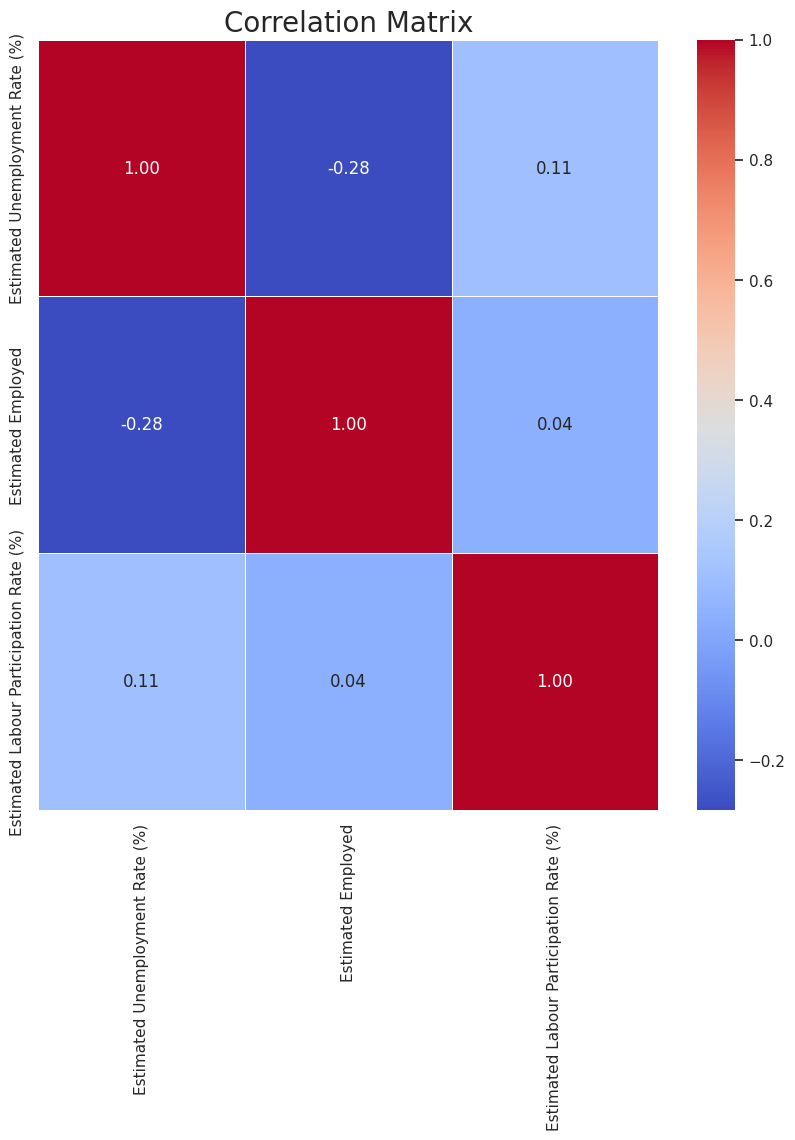

In [97]:
numeric_df = df1.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

There is a strong negative correlation (-0.28) between the estimated unemployment rate and the estimated employed population. The relationships between the other pairs of variables are weaker.

